### Generate: Acoustic impedance, normalized elastic impedance, lambda-mu-rho, AVO and angle gathers 

Dataset: well #2 from Avseth et al. (2010)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import impedance as ip
import avo_func as avo

%matplotlib inline

Import well 2

In [2]:
w2=np.recfromcsv('qsiwell2.csv',names=True)
w2z=w2['depth']
w2vp=w2['vp']/1e3
w2vs=w2['vs']/1e3
w2vpvs=w2['vpvs']
w2rho=w2['rho']
w2phi=w2['nphi']
w2gr=w2['gr']

well2_il, well2_xl = 1376, 1776

tops_w2={'Heimdal': 2153,'OWC': 2183}

Plot the logs

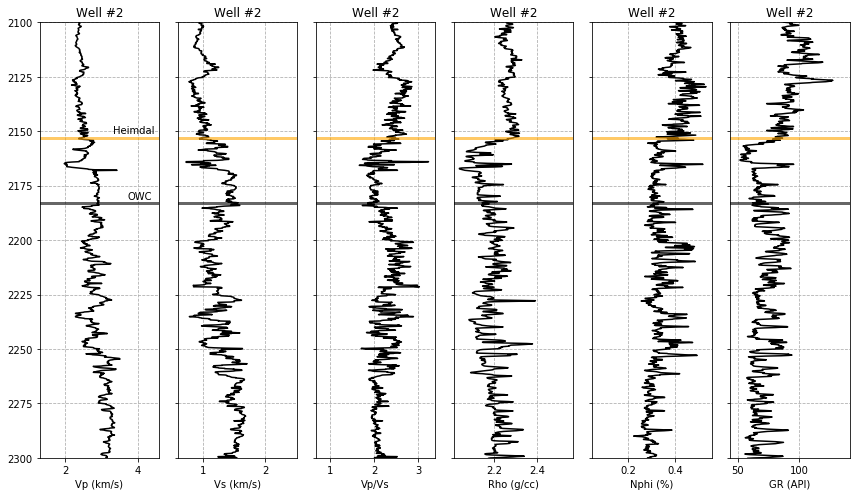

In [3]:
log = [w2vp, w2vs, w2vpvs, w2rho, w2phi, w2gr]
unit = ['Vp (km/s)', 'Vs (km/s)', 'Vp/Vs', 'Rho (g/cc)', 'Nphi (%)', 'GR (API)']

f, ax = plt.subplots(nrows=1,ncols=6,figsize=(12,7))
for i in range(len(log)):
    ax[i].plot(log[i],w2z,'-k')
    ax[i].set_title('Well #2')
    ax[i].axhline(y=float(tops_w2['Heimdal']),color='orange',lw=3,alpha=0.6)
    ax[i].axhline(y=float(tops_w2['OWC']),color='black',lw=3,alpha=0.6)
    ax[i].set_xlabel(unit[i])
    ax[i].set_ylim(2300,2100)
    if i == 0:
        ax[i].text(3.3,tops_w2['Heimdal']-2,'Heimdal')
        ax[i].text(3.7,tops_w2['OWC']-2,'OWC')
    else:
        ax[i].set_yticklabels([])
    ax[i].grid(linestyle='--')
        
plt.tight_layout()

Computations - AI, NEI, LRM

In [4]:
angle = 30

#poisson ratio
pr=0.5*((w2vpvs**2-2)/(w2vpvs**2-1))

ai=ip.ai(w2vp,w2rho) # acoustic impedance
#ei=ip.ei(w2vp,w2vs,w2rho,angle) # elastic impedance
lambda_rho,mu_rho=ip.lrm(w2vp,w2vs,w2rho) # lambda rho and mu rho

#get the closest location of the top on the depth array as reference to NEI
index = (np.abs(w2z - tops_w2['Heimdal'])).argmin()
#w2z[index]
nei=ip.nei(w2vp,w2vs,w2rho,w2vp[index],w2vs[index],w2rho[index],angle) # normalized elastic impedance

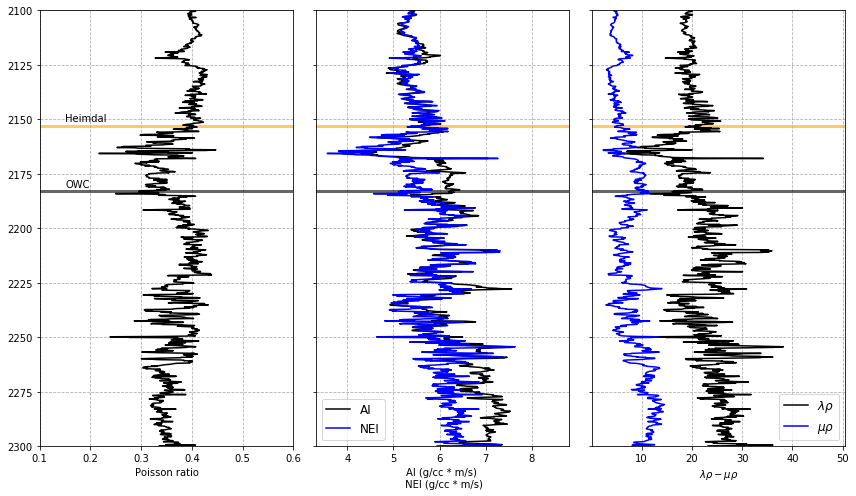

In [5]:
log = [pr, ai, nei, lambda_rho, mu_rho]
unit = ['Poisson ratio', 'AI (g/cc * m/s) \n NEI (g/cc * m/s)', r'$\lambda\rho - \mu\rho$']

f, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,7))
for i in range(3):
    ax[i].axhline(y=float(tops_w2['Heimdal']),color='orange',lw=3,alpha=0.6)
    ax[i].axhline(y=float(tops_w2['OWC']),color='black',lw=3,alpha=0.6)  
    ax[i].grid(linestyle='--')
    ax[i].set_ylim(2300,2100)
    if i == 0:
        ax[i].plot(log[i],w2z,'-k')  
        ax[i].text(0.15,tops_w2['Heimdal']-2,'Heimdal')
        ax[i].text(0.15,tops_w2['OWC']-2,'OWC')
        ax[i].set_xlim(0.1,0.6)
        ax[i].set_xlabel(unit[i]) 
    elif i == 1:
        ax[i].plot(log[1],w2z,'-k',label='AI')
        ax[i].plot(log[2],w2z,'-b',label='NEI')
        ax[i].legend(loc='lower left',fontsize='large')  
        ax[i].set_yticklabels([])
        ax[i].set_xlabel(unit[i])
    else:
        ax[i].plot(log[3],w2z,'-k',label=r'$\lambda\rho$')
        ax[i].plot(log[4],w2z,'-b',label=r'$\mu\rho$')
        ax[i].legend(loc='lower right',fontsize='large')  
        ax[i].set_yticklabels([])
        ax[i].set_xlabel(unit[i])
plt.tight_layout()

AVO

In [6]:
theta = np.arange(0,angle+1,1)
I,G,shuey,_ = avo.shuey(w2vp[index],w2vs[index],w2rho[index],w2vp[index+1],w2vs[index+1],w2rho[index+1],theta)

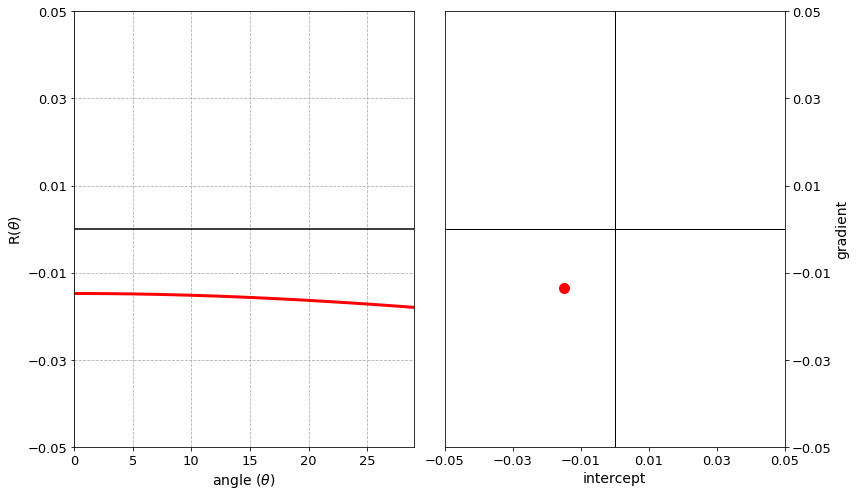

In [7]:
mxplot=0.05

f, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,7))

ax[0].plot(theta,shuey,'-',color='red',linewidth=3)
ax[0].axhline(0, color='k')
ax[0].set_xlabel('angle ($\\theta$)', fontsize=14)
ax[0].set_ylabel('R($\\theta$)', fontsize=14)
yt=np.linspace(-mxplot,mxplot,6)
ax[0].set_yticks(yt)
ax[0].set_xlim(0.,np.max(angle-1))
ax[0].set_ylim(-mxplot,mxplot)
ax[0].tick_params(labelsize=13)
ax[0].grid(linestyle='--')

ax[1].plot(I,G,'o',color='red',markersize=10)
ax[1].axhline(0, color='k', lw=1)
ax[1].axvline(0, color='k', lw=1)
ax[1].set_xlabel('intercept', fontsize=14)
ax[1].set_ylabel('gradient', fontsize=14)
ax[1].set_xlim(-mxplot,mxplot)
ax[1].set_ylim(-mxplot,mxplot)
yt=np.linspace(-mxplot,mxplot,6)
xt=np.linspace(-mxplot,mxplot,6)
ax[1].set_yticks(yt)
ax[1].set_xticks(xt)
ax[1].xaxis.set_label_position('bottom')
ax[1].xaxis.tick_bottom()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].tick_params(labelsize=13)

plt.tight_layout()

Generate the angle gather

In [8]:
theta = np.arange(0,angle+1,1)
anglegather=np.zeros((len(w2vp),len(theta)))
NI=np.zeros((len(w2vp)))

In [9]:
theta = np.arange(0,angle+1,1)

anglegather=np.zeros((len(w2vp),len(theta)))
NI=np.zeros((len(w2vp)))
                     
rc=avo.reflect_coef(np.nan_to_num(ai)+1e-17) #reflection coefficient - normal incidence
#define the ricker wavelet
freq=25
length = 0.150
dt = 0.001
time,wavelet=avo.rickerwave(freq, length, dt)
#normal incidence offset gather
NI=np.convolve(wavelet,rc,mode='same')
#reflectivity on a interface
reflect,r0,g=avo.shueyrc(w2vp,w2vs,w2rho,theta)
#generate the angle gather
gather=[]
for j in range(len(theta)):
    gather.append(np.convolve(wavelet,reflect[:,j],mode='same'))
anglegather=np.asarray(gather).T

time2=np.arange(0,(len(ai))*dt,dt)

Plot the angle gather

C:\Users\Felipe\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Felipe\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Felipe\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Felipe\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Felipe\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Felipe\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Felipe\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Felipe\anaconda3\lib\site-packages\ipykernel_l

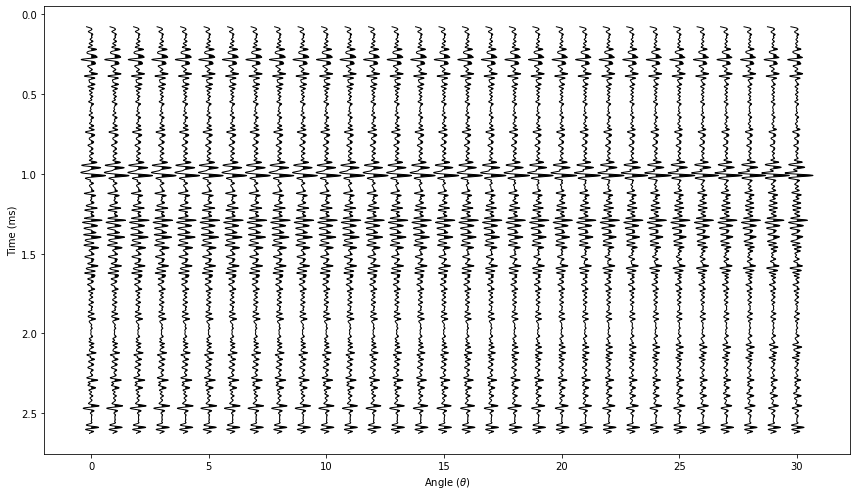

In [10]:
scale_factor=4. #this is scalable according to the plot
anglegatherplt=anglegather*scale_factor #just for the plot
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
for i in range(len(theta)):
    ax.plot(i+anglegatherplt[:,i],time2,'k',linewidth=1)
    ax.fill_betweenx(time2,anglegatherplt[:,i]+i,i,
                        where=anglegatherplt[:,i]+i>i,facecolor='black')
ax.invert_yaxis()
ax.set_xlabel('Angle ($\\theta$)')
ax.set_ylabel('Time (ms)')
plt.tight_layout()

C:\Users\Felipe\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Felipe\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


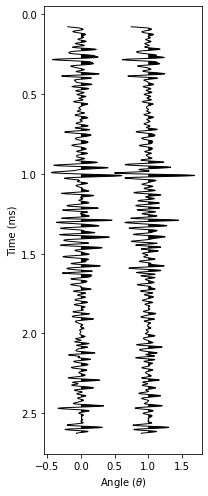

In [11]:
scale_factor=4. #this is scalable according to the plot
anglegatherplt=anglegather*scale_factor #just for the plot
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(3,7))
i=0
ax.plot(anglegatherplt[:,i],time2,'k',linewidth=1)
ax.fill_betweenx(time2,anglegatherplt[:,i]+i,i,
                    where=anglegatherplt[:,i]+i>i,facecolor='black')
i=30
ax.plot(1+anglegatherplt[:,i],time2,'k',linewidth=1)
ax.fill_betweenx(time2,anglegatherplt[:,i]+1,1,
                    where=anglegatherplt[:,i]+i>i,facecolor='black')


ax.invert_yaxis()
ax.set_xlabel('Angle ($\\theta$)')
ax.set_ylabel('Time (ms)')
plt.tight_layout()

## References

Alessandro del Monte - Top Heimdal map https://github.com/aadm/geophysical_notes/blob/master/top_heimdal_map.ipynb

Avseth, P., Mukerji, T., & Mavko, G., 2010. Quantitative seismic interpretation: Applying rock physics tools to reduce interpretation risk. Cambridge university press.

Shuey,R.T., 1985, A simplification of Zoeppritz equations: Geophysics, 50, 609–614.

The dataset: https://srb.stanford.edu/quantitative-seismic-interpretation